### Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

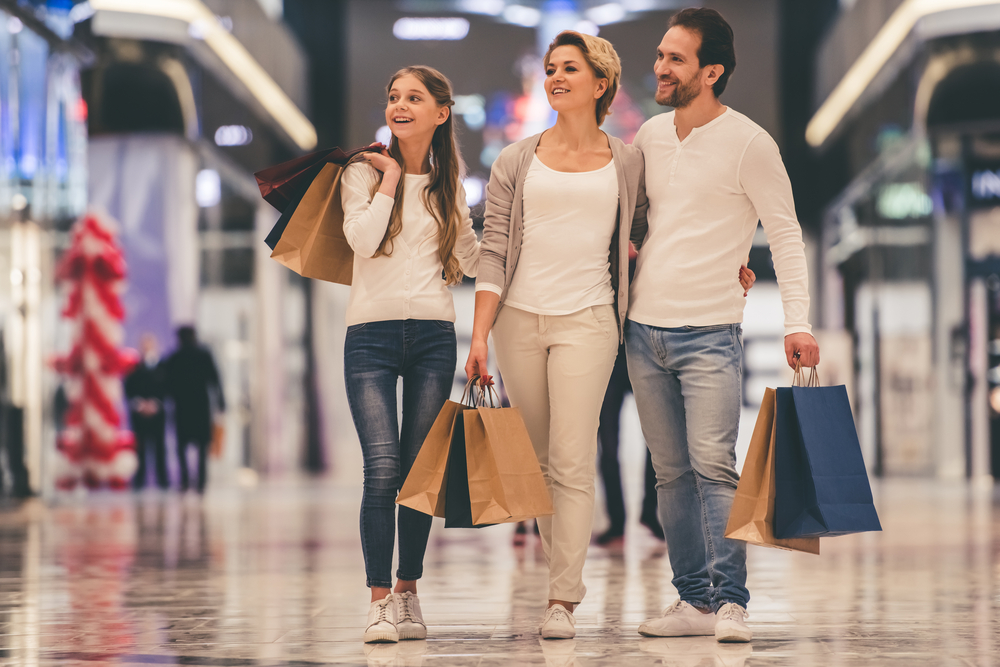

In [28]:
from IPython.display import Image
Image("G:/ML portfolio projects/Own Projects/Mall Customer Segmentation Data//1.png")

In [2]:
# Step 1: Data Exploration
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Explore the dataset
print(data.head())
print(data.shape)
print(data.dtypes)
print(data.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.75000

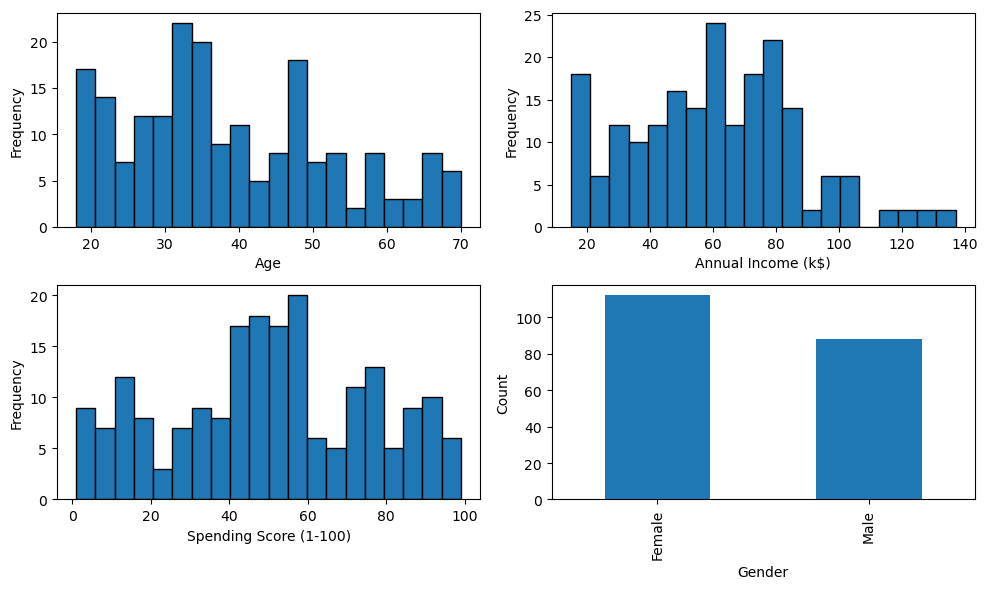

In [4]:
# Visualize data distributions
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(data['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(data['Annual Income (k$)'], bins=20, edgecolor='k')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(data['Spending Score (1-100)'], bins=20, edgecolor='k')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
data['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [5]:
# Step 2: Data Preprocessing
# Handle missing values (if any)
# data.fillna(0, inplace=True) or data.dropna(inplace=True)

In [6]:
# Check for missing data
missing_data = data.isnull().sum()

# Display the count of missing values for each column
print(missing_data)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = data_scaled

### Dimensionality Reduction (PCA Analysis)

In [8]:
from sklearn.decomposition import PCA

In [9]:
# Step 3: Dimensionality Reduction (PCA Analysis)
# Prepare the data (numerical features)
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[numerical_features]

In [10]:
# Apply PCA
pca = PCA(n_components=None)  # None means it will keep all principal components
X_pca = pca.fit_transform(X)

In [11]:
# Analyze Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

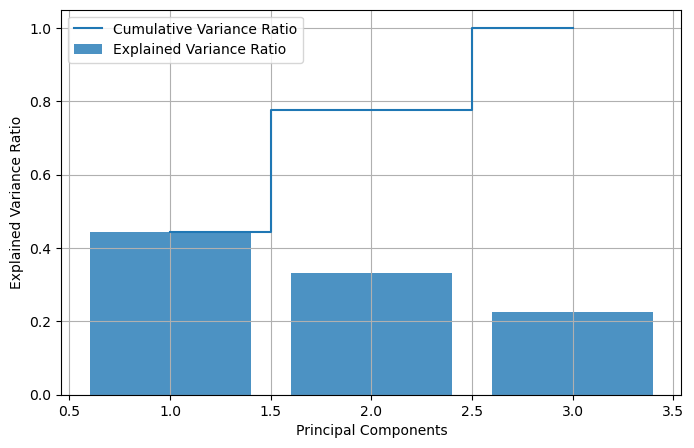

In [12]:
# Visualize Explained Variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center',
        label='Explained Variance Ratio')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid()
plt.show()

In [13]:
# Decide on the number of components to retain based on explained variance
# For example, if you want to retain 95% of the variance, you can use:
num_components_to_retain = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Number of components to retain for 95% variance:", num_components_to_retain)

Number of components to retain for 95% variance: 3


In [14]:
# Reapply PCA with the chosen number of components
pca = PCA(n_components=num_components_to_retain)
X_pca = pca.fit_transform(X)

In [15]:
# Assuming you have already applied PCA with the chosen number of components and obtained X_pca

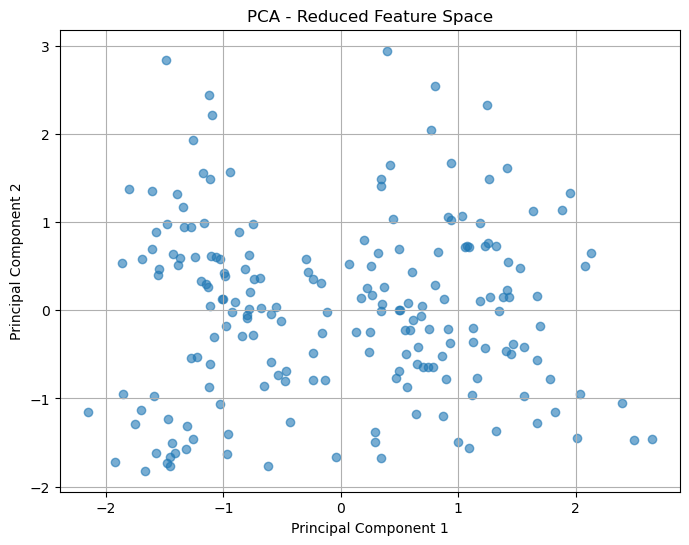

In [16]:
# Visualization of PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Reduced Feature Space')
plt.grid()
plt.show()

### K-means clustering

C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

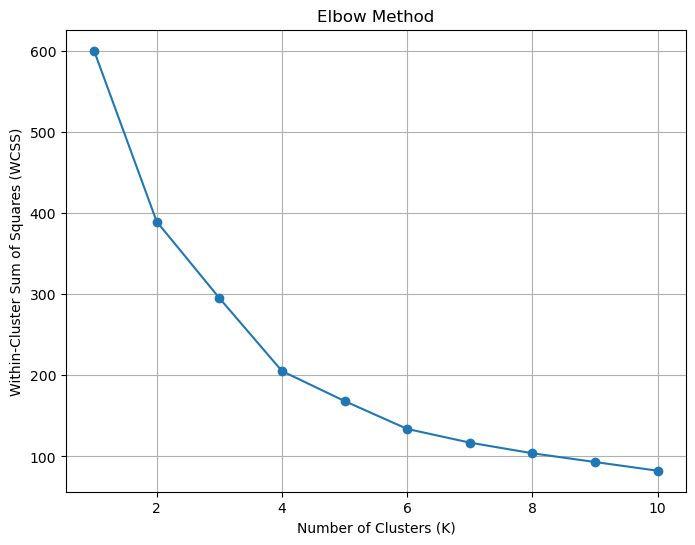

C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

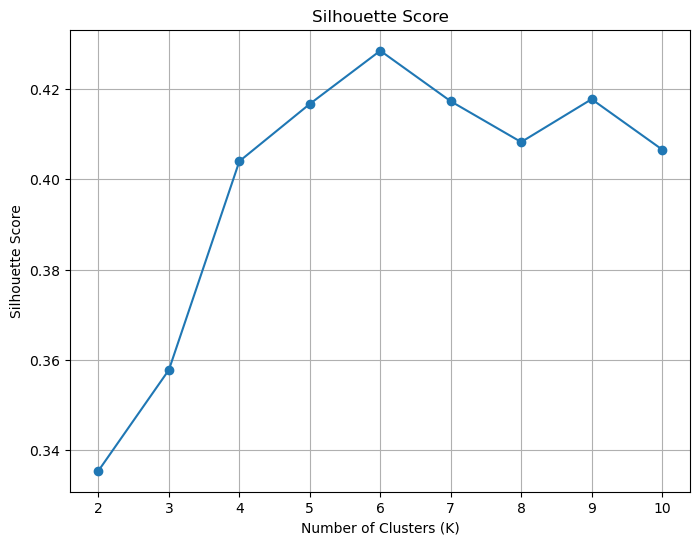

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assume X_pca is the PCA-transformed data (as calculated in previous steps)

# Elbow Method to determine the optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to visualize the "elbow" point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid()
plt.show()

# Silhouette Score to determine the optimal K
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_pca, labels))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid()
plt.show()

C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


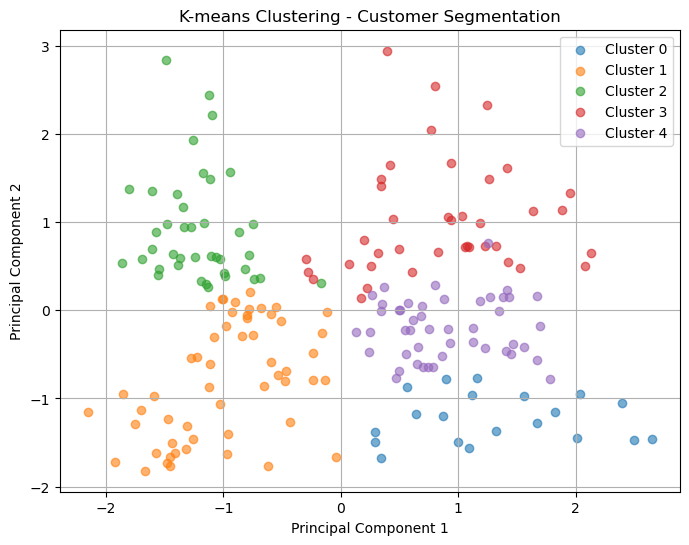

   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male -1.424569           -1.738999               -0.434801   
1           2    Male -1.281035           -1.738999                1.195704   
2           3  Female -1.352802           -1.700830               -1.715913   
3           4  Female -1.137502           -1.700830                1.040418   
4           5  Female -0.563369           -1.662660               -0.395980   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  


In [18]:
# Implement K-means Clustering
k = 5  # Replace with the chosen value of K
kmeans = KMeans(n_clusters=k, random_state=42)
predicted_clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the original DataFrame
data['Cluster'] = predicted_clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[predicted_clusters == i, 0], X_pca[predicted_clusters == i, 1], label=f'Cluster {i}', alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering - Customer Segmentation')
plt.legend()
plt.grid()
plt.show()

# Print the DataFrame with cluster labels
print(data.head())

              Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                      
0        0.531074           -1.290508               -1.236467
1       -0.980679           -0.743060                0.467440
2       -0.428806            0.974847                1.216085
3        0.073331            0.974945               -1.197297
4        1.204841           -0.235773               -0.052368


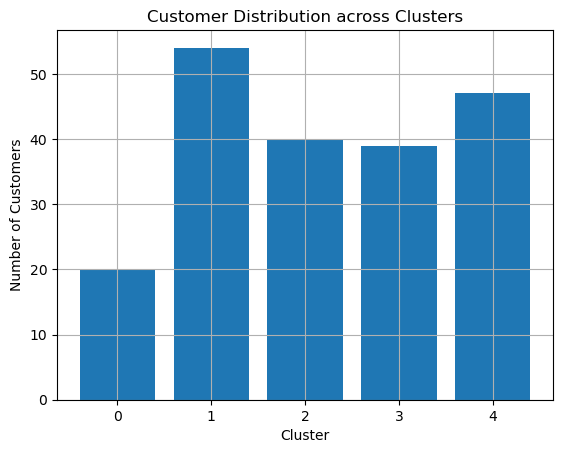

In [20]:
# Group the data by clusters and calculate the mean of each feature for each cluster
cluster_means = data.groupby('Cluster').mean()

# Analyze the mean values of Age, Annual Income, and Spending Score for each cluster
print(cluster_means[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Count the number of customers in each cluster
cluster_counts = data['Cluster'].value_counts()

# Plot a bar chart to visualize the distribution of customers across clusters
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution across Clusters')
plt.xticks(cluster_counts.index)
plt.grid()
plt.show()

In [21]:
# To better interpret the clustering results, we can try different visualization techniques and use cluster statistics.
# One common approach is to plot the original features against each other, colored by the cluster labels, to understand how the clusters separate in the original feature space.
# This can provide more meaningful insights.

C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


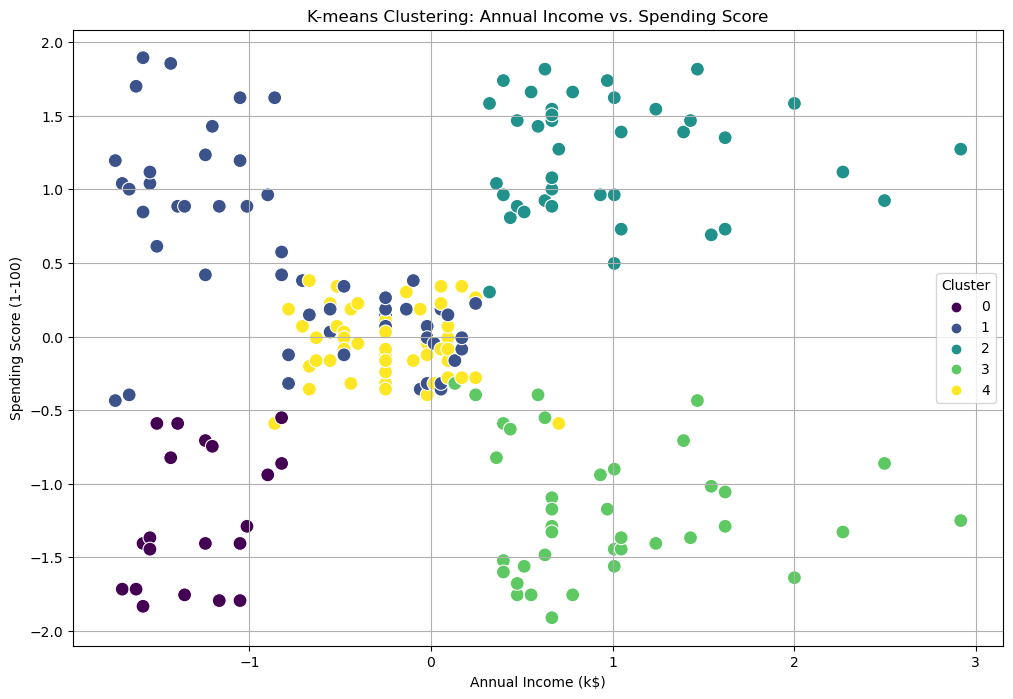

In [24]:
import seaborn as sns
from sklearn.cluster import KMeans

# Perform K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Add the cluster labels to the original data
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = kmeans_labels

# Plot original features against each other, colored by cluster labels
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data_with_clusters, palette='viridis', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering: Annual Income vs. Spending Score')
plt.grid()
plt.show()

In [25]:
# Calculate mean values of features for each cluster
cluster_means = data_with_clusters.groupby('Cluster').mean()

# Print mean values for each cluster
print(cluster_means)

         CustomerID       Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                  
0         24.100000  0.531074           -1.290508               -1.236467
1         55.648148 -0.980679           -0.743060                0.467440
2        161.025000 -0.428806            0.974847                1.216085
3        159.743590  0.073331            0.974945               -1.197297
4         83.872340  1.204841           -0.235773               -0.052368


### GMM Clustering - Agglomerative Hierarchical Clustering

C:\Users\SOMNATH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


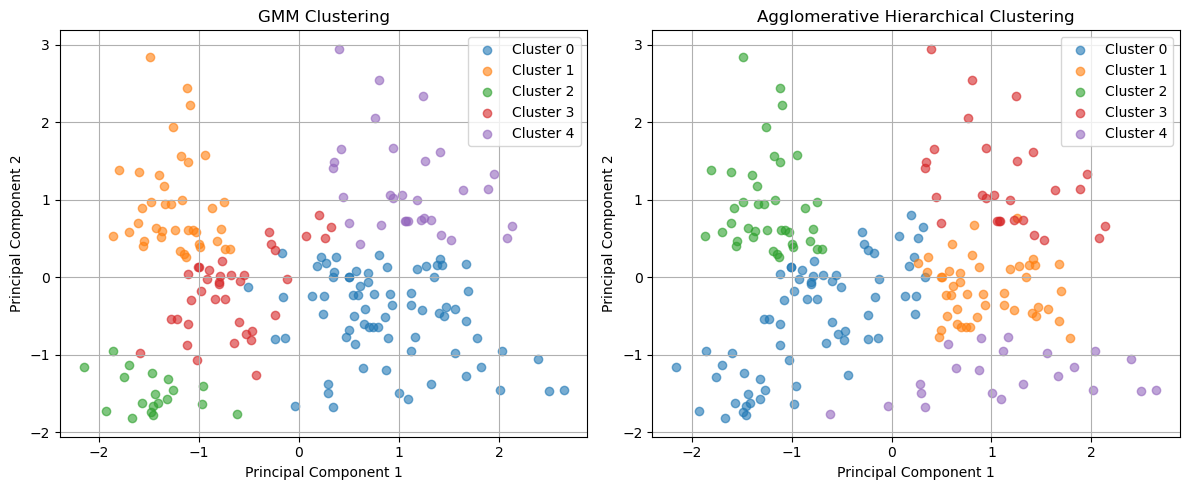

In [26]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

# Step 6: Additional Algorithms

# GMM Clustering
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_clusters = gmm.fit_predict(X_pca)

# Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clusters = agg_clustering.fit_predict(X_pca)

# Visualize GMM Clustering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i in range(5):
    plt.scatter(X_pca[gmm_clusters == i, 0], X_pca[gmm_clusters == i, 1], label=f'Cluster {i}', alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clustering')
plt.legend()
plt.grid()

# Visualize Agglomerative Hierarchical Clustering
plt.subplot(1, 2, 2)
for i in range(5):
    plt.scatter(X_pca[agg_clusters == i, 0], X_pca[agg_clusters == i, 1], label=f'Cluster {i}', alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Hierarchical Clustering')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 7: Evaluation Metrics
# Calculate Silhouette Score
kmeans_silhouette = silhouette_score(X_pca, labels)
gmm_silhouette = silhouette_score(X_pca, gmm_clusters)
agg_silhouette = silhouette_score(X_pca, agg_clusters)

# Calculate Davies-Bouldin Index
kmeans_db = davies_bouldin_score(X_pca, labels)
gmm_db = davies_bouldin_score(X_pca, gmm_clusters)
agg_db = davies_bouldin_score(X_pca, agg_clusters)

# Print the scores
print(f'K-means Silhouette Score: {kmeans_silhouette:.2f}, Davies-Bouldin Index: {kmeans_db:.2f}')
print(f'GMM Silhouette Score: {gmm_silhouette:.2f}, Davies-Bouldin Index: {gmm_db:.2f}')
print(f'Agglomerative Silhouette Score: {agg_silhouette:.2f}, Davies-Bouldin Index: {agg_db:.2f}')

K-means Silhouette Score: 0.41, Davies-Bouldin Index: 0.87
GMM Silhouette Score: 0.38, Davies-Bouldin Index: 0.89
Agglomerative Silhouette Score: 0.39, Davies-Bouldin Index: 0.92


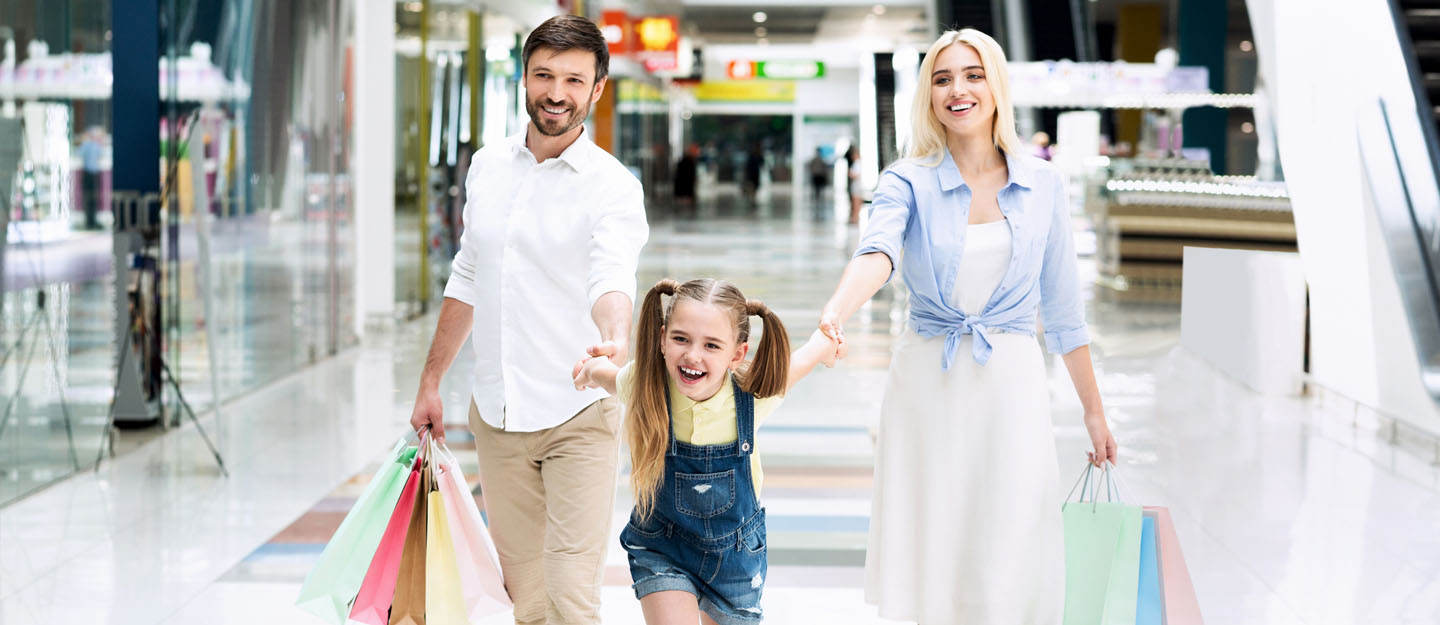

In [30]:
Image("G:/ML portfolio projects/Own Projects/Mall Customer Segmentation Data//2.jpg")